<a href="https://colab.research.google.com/github/Kot71nsk/Car_Price/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price/vehicles.csv', usecols=['price', 'year', 'manufacturer', 'model',
                                                                                           'fuel', 'odometer', 'transmission'], nrows=25000)


Количество пропущенных значений в каждом столбце:
 price              0
year             160
manufacturer    1102
model            364
fuel             182
odometer         264
transmission     104
dtype: int64


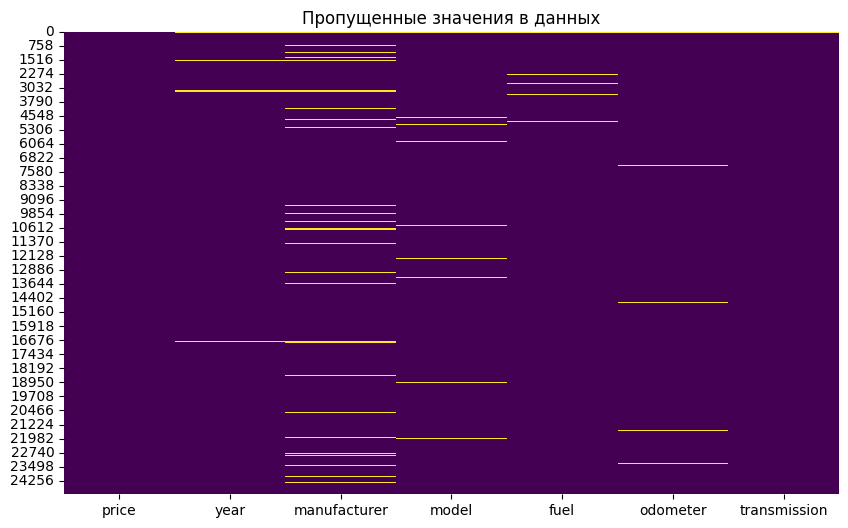

In [3]:
# Проверка на пропущенные значения
print("Количество пропущенных значений в каждом столбце:\n", df.isnull().sum())

# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в данных')
plt.show()

**Графики зависимостей**

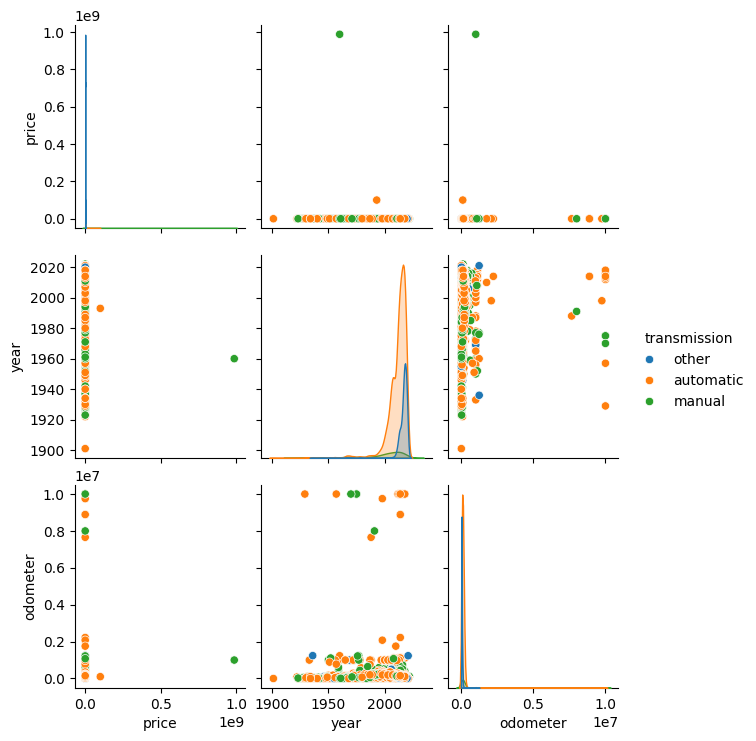

In [4]:
sns.pairplot(data=df, aspect=.85, hue='transmission')
plt.show()

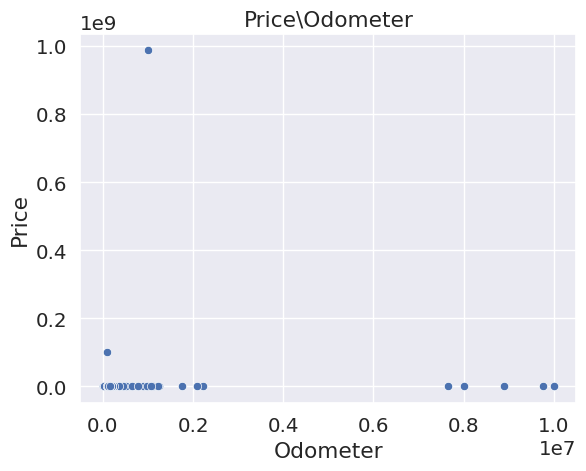

In [5]:
sns.set(font_scale=1.3)
sns.scatterplot(x='odometer', y='price', data=df)
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price\Odometer')
plt.show()


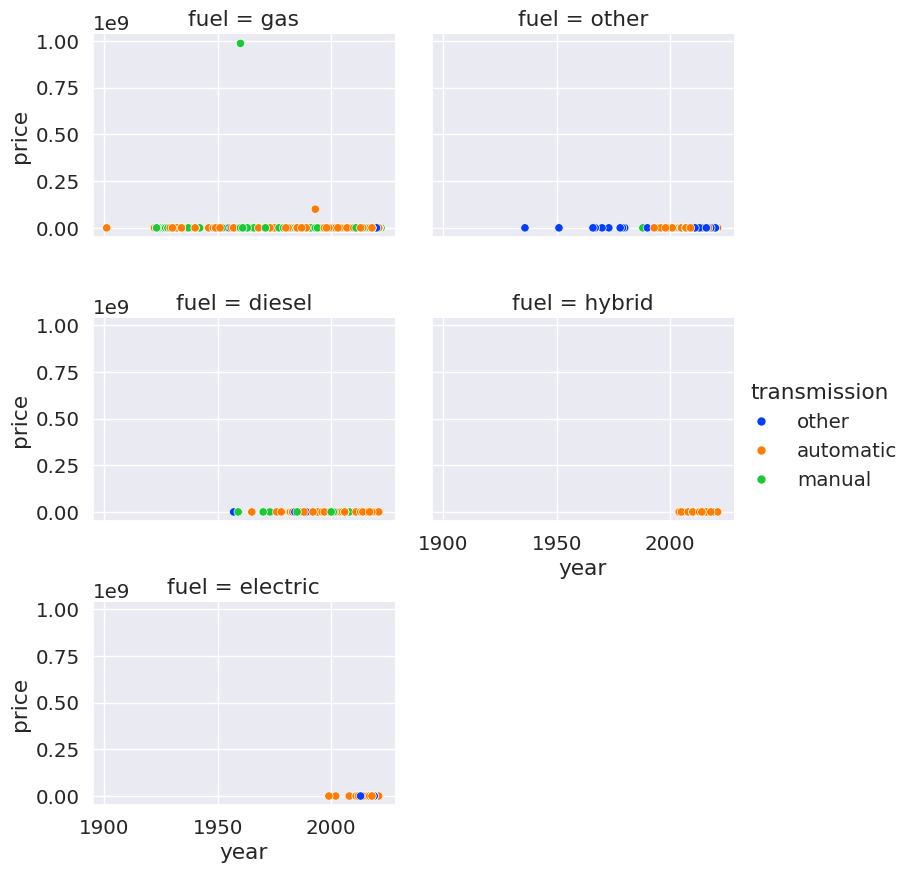

In [6]:
sns.relplot(x='year', y='price', data=df, palette='bright', height=3, aspect=1.3,
            kind='scatter', hue='transmission', col='fuel', col_wrap=2)
plt.show()

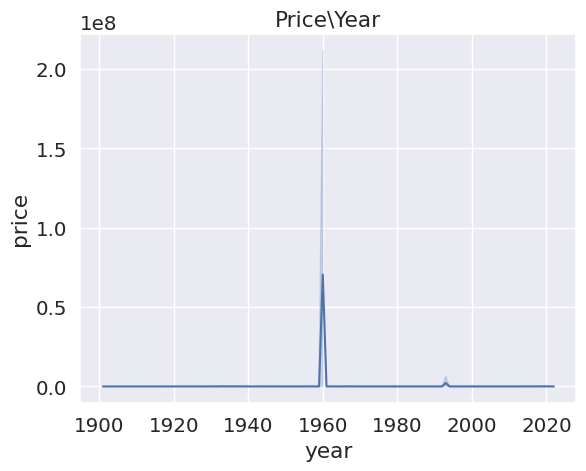

In [7]:
sns.lineplot(x="year", y="price", data=df)
plt.title('Price\Year')
plt.show()

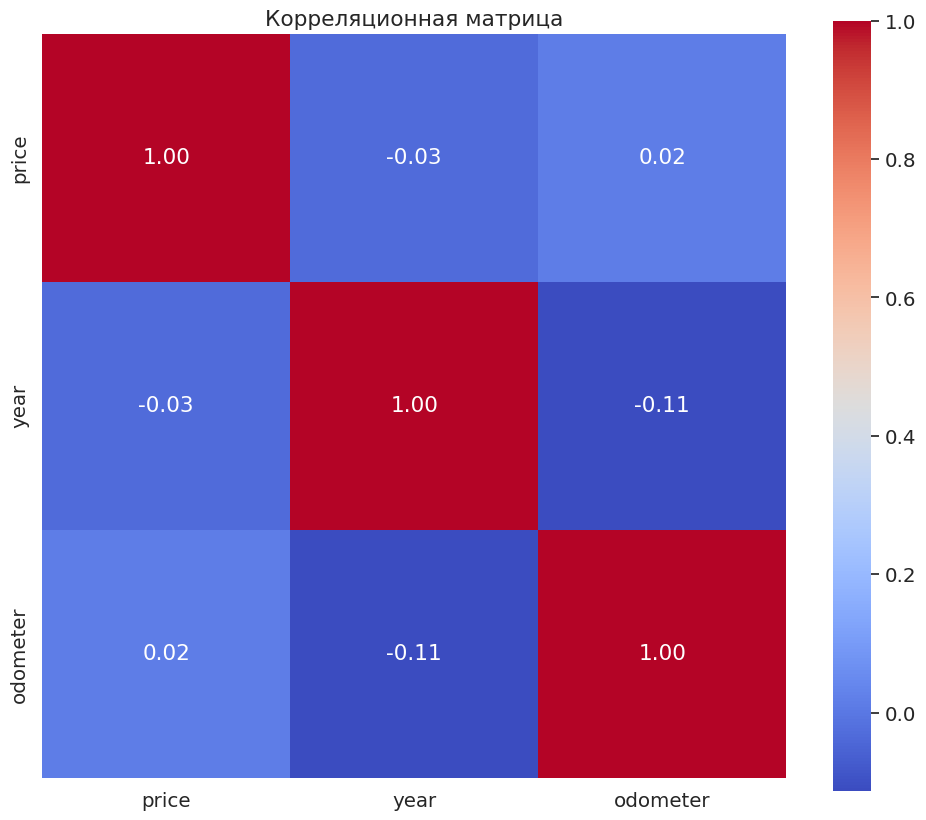

In [8]:
# Корреляционный анализ
df1 = df[['price', 'year', 'odometer']]
plt.figure(figsize=(12, 10))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()


**Подготовка данных**

In [20]:
df = df.dropna()

# Подготовка данных
df.loc[:, 'price'] = df['price'].astype(float)
df.loc[:, 'year'] = df['year'].astype(int)
df.loc[:, 'odometer'] = df['odometer'].astype(int)


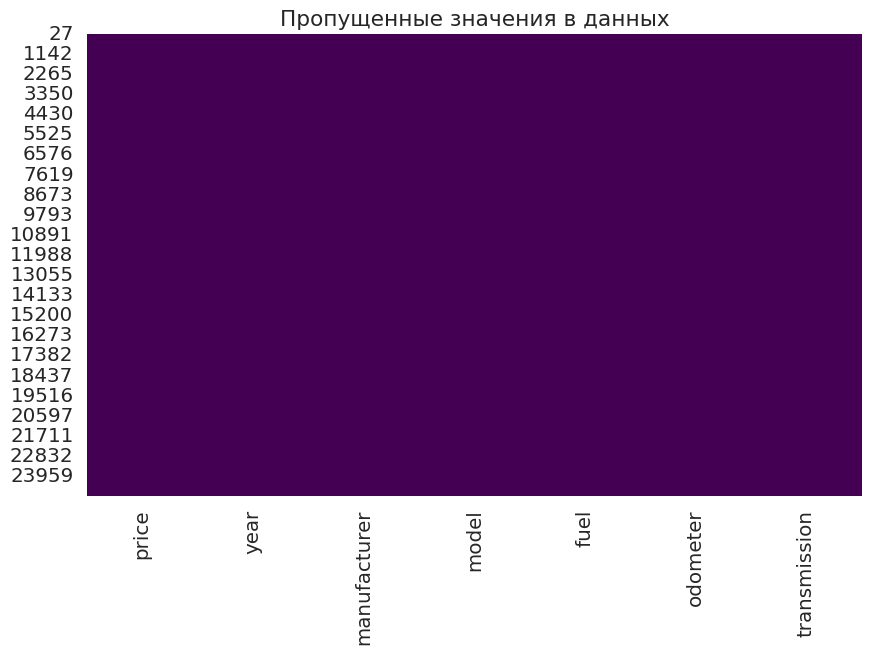

In [10]:
# Визуализация пропущенных значений после подготовки данных
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в данных')
plt.show()

In [21]:
df = df.loc[df['price'] != 0.0]

In [22]:
# Нормализация только для числовых столбцов
numeric_cols = ['price', 'year', 'odometer']
# min_max_scaler = MinMaxScaler()
# df[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])

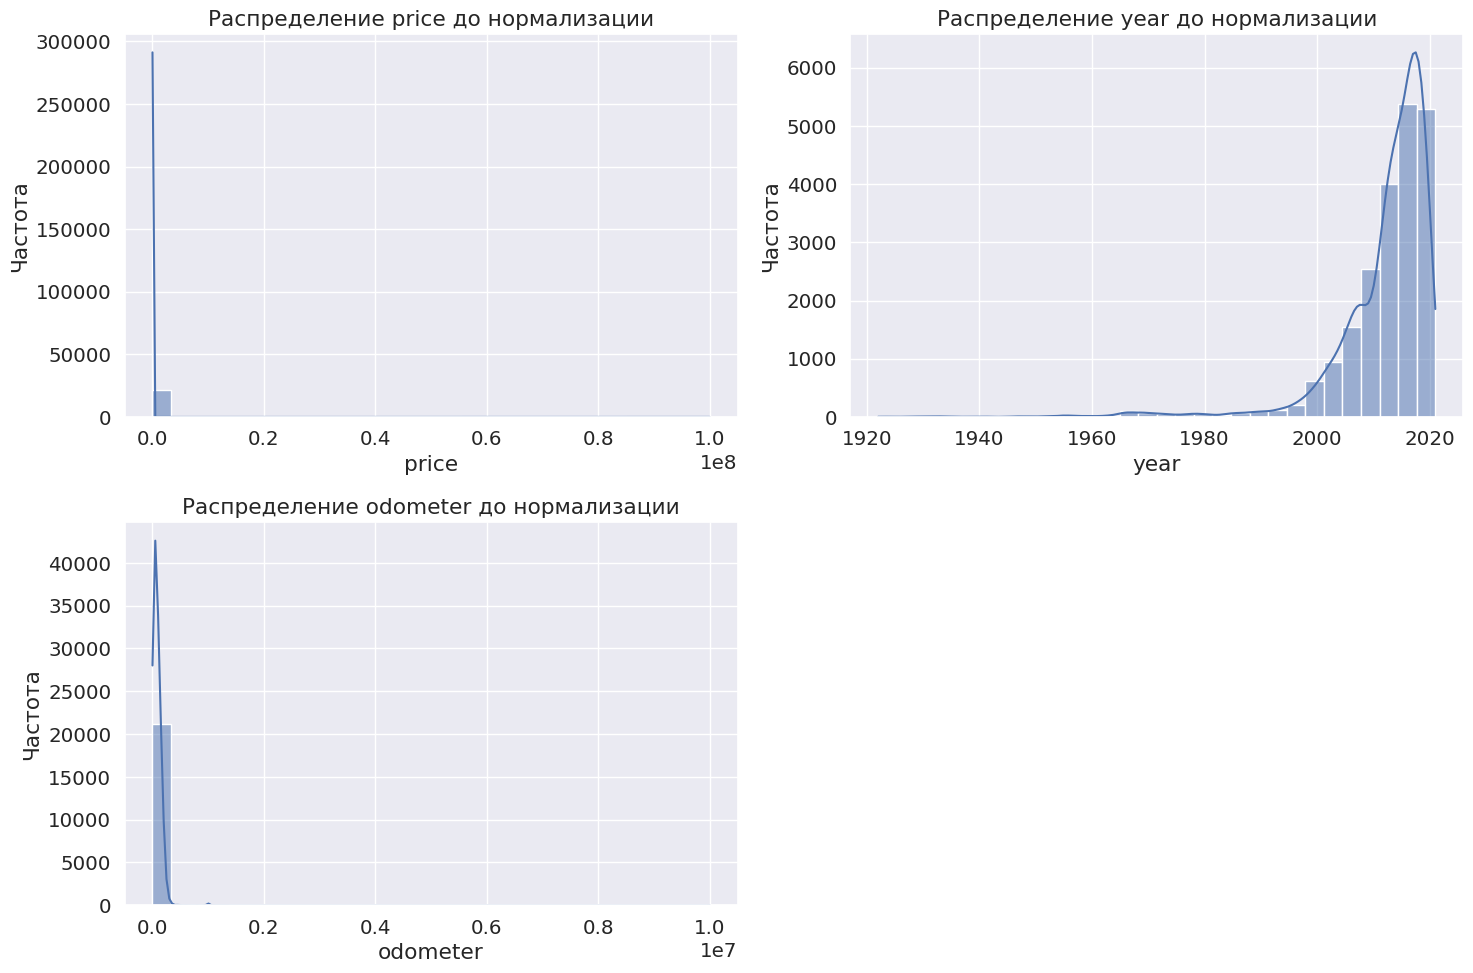

In [23]:
# Графики распределения признаков до нормализации
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Распределение {col} до нормализации')
    plt.xlabel(col)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import Normalizer
# Нормализация данных с помощью Normalizer
normalizer = Normalizer()
df[numeric_cols] = normalizer.fit_transform(df[numeric_cols])

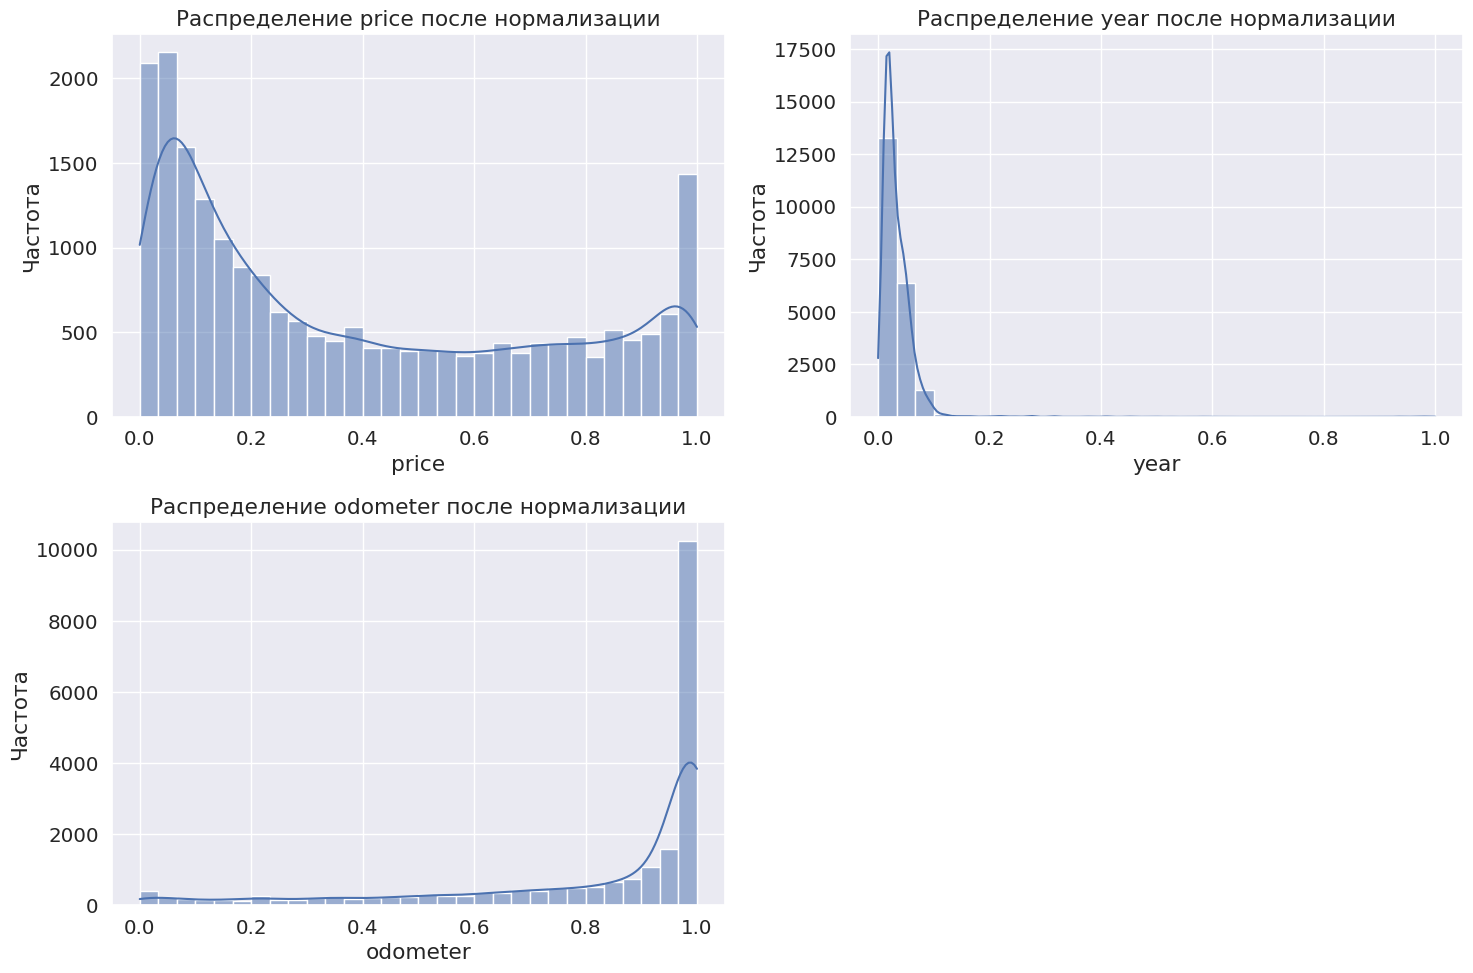

In [26]:
# Графики распределения признаков после нормализации
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Распределение {col} после нормализации')
    plt.xlabel(col)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [27]:
# Применяем get_dummies
df = pd.get_dummies(df, columns=['manufacturer','model', 'fuel', 'transmission'])

# Переименовываем столбцы, чтобы избежать недопустимых символов
df.columns = df.columns.str.replace(r'\[', '_', regex=True).str.replace(r'\]', '_', regex=True)

# Разделяем на тестовые и тренировочные данные
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Проверка типов данных
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Столбцы с недопустимыми типами:", non_numeric_cols)
else:
    print("Все столбцы имеют числовые типы данных.")

Все столбцы имеют числовые типы данных.


In [29]:
# Модель Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')


MAE: 0.00
MSE: 0.00


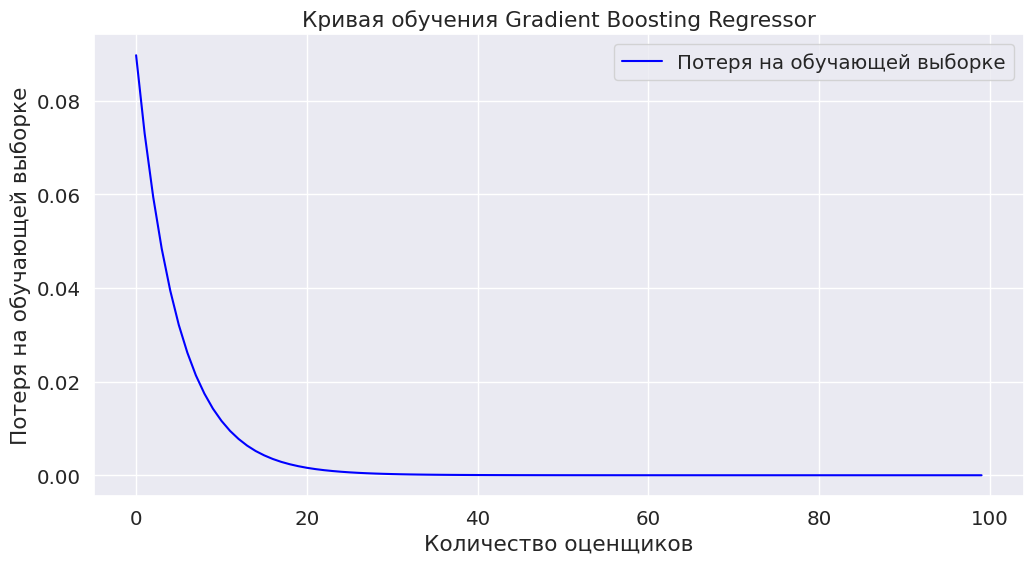

In [30]:
# Визуализация процесса обучения
plt.figure(figsize=(12, 6))
plt.plot(model.train_score_, label='Потеря на обучающей выборке', color='blue')
plt.title('Кривая обучения Gradient Boosting Regressor')
plt.xlabel('Количество оценщиков')
plt.ylabel('Потеря на обучающей выборке')
plt.legend()
plt.show()